<img src="images/logo.png" style="float: right; width: 350px;">
<h1><center>Práctica 2: Solución a un problema de regresión </center></h1>

# Regresión lineal múltiple

**Descripción del problema de negocio** Un fondo de capital de riesgo lo contrató como científico de datos para entrenar un modelo de aprendizaje automático y, de hecho, un modelo de regresión lineal múltiple para comprender las correlaciones entre estos features, que son el gasto en I+D(R&D Spend), administración(Administration) y marketing (Marketing spend), así como el estado(State) y las ganancias(Profit) de 50 startups.

El **Objetivo** del fondo de capital de riesgo es determinar en qué startup invertir sobre esta información.
Y para nosotras como cientificas de datos, entrenar un modelo de ML que pueda comprender bien estas correlaciones, e implementar este modelo. 

### Importando librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Importamos el dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
# Independientes
X = dataset.iloc[:, :-1].values
# Dependiente
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

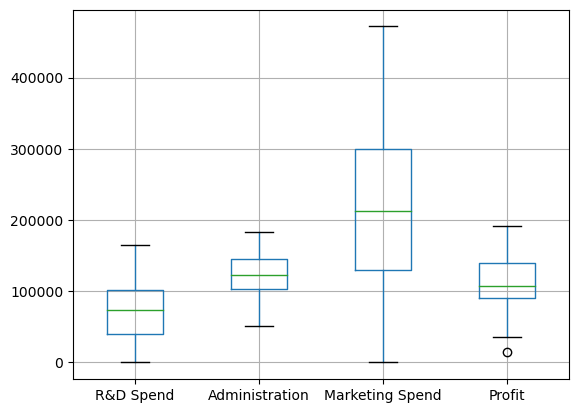

In [4]:
#Boxplot para entender la distribucion de cada variable
dataset.boxplot()
plt.show()

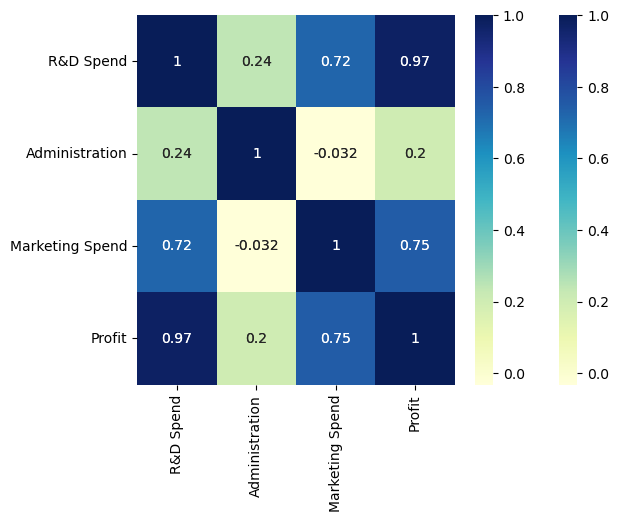

In [13]:
# correlation de las variables

# Calculando la correlacion
correlacion=dataset.corr()
correlacion
# Graficando la correlación
sns.heatmap(correlacion, annot=True,
xticklabels=correlacion.columns,
yticklabels=correlacion.columns,
cmap='YlGnBu')
plt.show()

### Codificación(Encoding) de datos categóricos

In [6]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Conjunto de datos preprocesado

In [7]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

No tenemos que aplicar escalado de funciones(**feature scaling**).Porque en la ecuación de la regresión lineal múltiple, tenemos coeficiente bn que se multiplica a cada variable independiente xn.

<img src="images/MLR.png" style="float: left; width: 350px;">

Conocemos cada feature, y por lo tanto no importa que unas características tengan valores más altos que otras porque los coeficientes compensarán para poner todo en la misma escala.

### Dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Entrenamiento del modelo de regresión lineal múltiple en el conjunto de entrenamiento

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicción de los resultados del conjunto de pruebas

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


### Obtener la ecuación de regresión lineal final con los valores de los coeficientes

In [11]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924854249


Por lo tanto, la ecuación de nuestro modelo de regresión lineal múltiple es:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Nota importante:** Para obtener estos coeficientes llamamos a los atributos "coef_" e "intercept_" de nuestro objeto regresor. Los atributos en Python son diferentes a los métodos y generalmente devuelven un valor simple o una matriz de valores.

Ahora usaremos la función R2 Score para comparar la precisión de nuestros modelos. **R-cuadrado** (R2) es una medida estadística que representa la proporción de la varianza de una variable dependiente que se explica por una variable o variables independientes en un modelo de regresión. También puede ser conocido como el coeficiente de determinación.

In [12]:
score = r2_score(y_test,y_pred)
score

0.9347068473282303